Psuedocode: 
Create a matrix of length of T/delta T by L/delta X
define a c

we have the initial 


In [1]:
R = 2 #length
T = 1 #Total Time
delta_t = .01 #Timestep
c = 1 #Wavespeed
     
delta_r = .01 #Spatial step
ntsteps = T/delta_t #number of time steps
nrsteps = R/delta_r #number of segments of string
using Plots
using FFTW

In [128]:
gamma = 1.2
#Initial Radius
r = zeros(Int(nrsteps)+3, 1)
r[1]= -1*delta_r
for i = 1:size(r,1)-1
    r[i+1]=r[i]+delta_r
end

#Time
t=zeros(Int(ntsteps)+1,1)
t[1]=0
for i = 1:Int(ntsteps)
    t[i+1]=t[i]+delta_t
end

rho_0 = zeros(Int(nrsteps)+3,1)
#placeholder rho_0
for i = 1:Int(nrsteps)+2
    rho_0[i] = 10*sin(pi*r[i]/R)/(r[i]/R)
end
p_0 = zeros(Int(nrsteps)+3,1)
#placeholder p_0
for i = 1:Int(nrsteps)+2
    p_0[i] = rho_0[i]^2
end
M = zeros(Int(nrsteps)+3,1)
M[1] = 0
for i = 3:Int(nrsteps)+2
    M[i+1]=M[i] + (4/3)*pi*(delta_r^3)*rho_0[i]
end
g_0 = zeros(Int(nrsteps)+3)
for i=1:Int(nrsteps)+3
    g_0[i]=M[i]/(r[i]^2)
end
#Zeta_r for normal intervals
Z_r = zeros(Int(nrsteps)+2,Int(ntsteps)+2)
for i=1:Int(nrsteps)+2
    Z_r[i,1:2].=4*sin(25*pi*r[i])
end
rho_prime = zeros(Int(nrsteps)+3,Int(ntsteps)+2)
p_prime = zeros(Int(nrsteps)+3,Int(ntsteps)+2)
dp_prime_dr  = zeros(Int(nrsteps)+3,1)
for j = 1:Int(ntsteps)



    #rho_prime calculation
    for i = 1:Int(nrsteps)+1
        rho_prime[i,j+1] = (-1/((r[Int(i+1)]^2)*delta_r))*(((r[Int(i+1)]^2)*rho_0[Int(i+1)]*Z_r[Int(i+1),j])-(r[i]^2)*rho_0[i]*Z_r[i,j])
        print(rho_prime[i,j+1])
    end
   #pprime at 
    for i = 1:Int(nrsteps)+2
        p_prime[i,j] = gamma*p_0[i]/rho_0[i] * rho_prime[i,j]
    end

    #dP/dR at normal i
    for i = 1:Int(nrsteps+2)
        dp_prime_dr[i] = (p_prime[i+1,j]-p_prime[i,j])/delta_r
    end
    #dZ/dt^2
    for i = 1:Int(nrsteps+2)
         Z_r[i,j+2] = (2*Z_r[i,j+1]-Z_r[i,j]+(delta_t^2)*(dp_prime_dr[i]-rho_prime[i,j+1]*g_0[i]))/rho_0[i] 
    end
    #Boundary Condition 
    Z_r[size(Z_r,1),j+2]=delta_r*(Z_r[Int(size(Z_r,1)-1),j+2]-(2/r[Int(size(Z_r,1)-1)])*Z_r[Int(size(Z_r,1)-1),j+2])
end


NaNNaN-10342.953514163864-3298.3425819553734996.3936101627248876.6333815877846383.446371921504-350.90206370449505-6789.464106364817-8856.197029386954-5341.2376094150351501.1576251418897429.414219997748824.1397960042724856.758561819174-2054.90980361074-7737.693741518975-8780.537553077274-4567.5820189060812374.29287166535967900.88050073438725.4934458038174367.447906441387-2576.1991501664625-7984.336885206798-8659.13760233911-4214.075626836462709.7515844401678016.9224746768048581.6267673020014087.359869386758-2799.2077451929977-8013.411475213643-8493.143860514225-3976.5509033823432857.94507495953537982.2097157290668393.897462327033875.407936827467-2893.966576626748-7928.507202284873-8284.12122711191-3780.08459181665742912.3735639141137855.7325842268538164.0732267136133688.104139799126-2916.5904336654767-7766.288357614527-8034.03522587622-3597.82106805302652909.0190971454337661.9499170810337894.31189186121453508.1193771595385-2891.410499138837-7544.09484953493-7745.229940675241-3418.234392

-43323.11176950097-15471.24228622987219673.1636283442641550.2444764349138383.14700469433613444.807847505108-17693.76872815286-36830.2170089263-33741.000694984046-11568.39625713706815804.34066714523832390.34052655749529405.0143892424829842.156062212416-14012.059675685137-28240.000693670925-25380.9348001994-8265.25267173949612322.91160781310124385.92437210147521671.9509576610946835.888599630853-10741.703609983862-20832.229630148184-18278.752854149112-5551.3339489143139272.0865816484317580.4952893005515199.6108057864044407.966847029823-7916.583927089021-14629.849177647364-12430.475328391796-3401.3249136225816676.62470915299911977.0740745280879965.099249551832526.1725216264513-5552.5759263534965-9616.730335341581-7795.18943384886-1776.5989132058384543.7593105562837541.2945540750045910.6122580222971146.1929645228865-3648.4096158078974-5741.314392965213-4299.729737908248-628.44074936575822863.43411514022274205.5781510584932950.1269290274768217.86342665839857-2183.446988710351-2921.2640870770

85903.10370019257130683.865685582196351.3683006439712073.621234174105-68232.62569713607-99679.16114080917-70858.61809313078-6069.79373365230253187.3465309804974170.7803955462750405.815837836821770.3636984228135-40561.64725995269-53567.581216771585-34369.9881786422051108.87689957904930135.15757532727437280.8188973119722147.75545974669-2828.2975933524954-21676.885233564837-24734.147256975753-13165.6700240825283619.263169556453714947.93670383216315373.0100520391926891.87131470293-3675.892677582555-9701.460235566927-8674.702431234673-2853.78891578115643137.47270392378965677.1261966986844166.200821051658680.7841615161047-2039.300527319941-2585.353786803593-1486.453122557703-259.312071804170394.50120534460972-207.62399249379305-461.3436432289699-319.3650036453558752.60357939564145294.949582192032.1513510793236713e66.923430764217654e7-7.079908504590933e7NaNNaN-462648.0359865738283015.742875106548461.1541404446326529.1148813454-111706.64642202832-431442.7866822457-431064.39615843014-137705.340

-1.8989350473501045e7-1.627446670122392e7-4.469949835300173e68.986572042154873e61.6275775169312071e71.3710934379581297e73.5326434032776286e6-7.839708442988187e6-1.3818123331059117e7-1.1433454022011958e7-2.7406649609167264e66.77271876957948e61.161451481966356e79.430388358625323e62.080443460750338e6-5.7916913943313025e6-9.65895364609863e6-7.687143586266716e6-1.5382611413722686e64.900173432689721e67.941914230260565e66.186762854874193e61.1004979555504392e6-4.0994251713856063e6-6.450945314149304e6-4.91051945481499e6-753859.65602612293.3886920378935537e65.17127685496161e63.8384943270337298e6485582.84264314093-2.7654883495136965e6-4.0864156220035315e6-2.9501240725504025e6-283611.90833516282.2258865192049183e63.178716179562947e62.2247075256652855e6136744.39503263118-1.7648052211190572e6-2.4299153502514516e6-1.6418610949702105e6-34742.76346497041.3762901728694083e61.821620020160419e61.181915379683461e6-31588.028995930523-1.0537816206806388e6-1.335740168915033e6-826247.950381564770356.4853361079

-2.595703650540237e8-2.91106163184602e8-1.5019033948405185e87.509503895847954e72.495368286928049e82.7199817252132e81.3397809152803084e8-7.832247613570583e7-2.3781221885518274e8-2.5262662760891306e8-1.1895218322683519e87.97511116253956e72.2480500120506182e82.3321165379014513e81.0503869216360857e8-7.968710919264922e7-2.108691628209178e8-2.1395660918829882e8-9.218758730900225e77.839004371082626e71.963161566104575e81.950474698393981e88.036248471853429e7-7.608510317030449e7-1.8142186272284523e8-1.7665172508678374e8-6.953371436161496e77.297081224520974e71.6643063272365105e81.5891721989284787e85.96736428782904e7-6.922392576974039e7-1.51557643942385e8-1.4197118252345186e8-5.075358431649633e76.5002516569922335e71.3699031794328606e81.2591956815809116e84.274185995634821e7-6.044791451235994e7-1.2288927718078026e8-1.1084678515072307e8-3.5602707414200604e75.568592918303731e71.0938914068371981e89.681583004421987e72.929582543894099e7-5.0827646378049515e7-9.6599347982183e7-8.38688295145242e7-2.37763957

-1.6821300363701772e73.887636585762086e76.0800638058923975e74.379639860482989e75.945439337878548e6-2.672844599927829e7-3.688432954992367e7-2.3904078335045848e7-520020.43233442111.752949024983268e72.1256177639433134e71.2030496797568573e7-1.6697261560618198e6-1.0884173066681784e7-1.148907838825172e7-5.390211107059286e62.118021380760371e66.323770598370362e65.709426533151584e61.9915000876836681e6-1.7735144792650852e6-3.3736874955111593e6-2.521094928289087e6-470253.79569531411.1899973871491896e61.5987055511495501e6924569.5795261117-60081.43566874398-650903.5246312196-629397.1325113775-237138.5799207988138386.14795419623267831.8090141488173618.9767551077518522.150062057874-64010.28057359623-55320.379346811-17043.177400326113-4083.420962402727-15294.195215369851-16682.847521651514-954.2161432852499-24602.41164244648-197838.73067573743-591676.6245763539-8.171152942433633e67.846457225366719e86.521633845697643e10-3.915239247326479e11-1.2969960019823434e144.039364319086094e144.1128348513074e17-4.

-1.2402155414238277e10-1.536446754438916e10-9.242641715377087e91.4045718366843317e99.970952683693525e91.1828881861706306e106.741850547052987e9-1.5334096994049878e9-7.887990400395052e9-8.952169115088308e9-4.803273348535337e91.5192305521910443e96.134985730291542e96.650950672121466e93.331293948838791e9-1.4111685968634455e9-4.686207460469897e9-4.842865532759383e9-2.238902587248136e91.248133557721537e93.511020984304806e93.4492254710946193e91.4488169136381292e9-1.0597740782048439e9-2.576140605827554e9-2.3970270441456537e9-8.940158288079891e88.676120512766474e81.8475450730168388e91.6203448907974532e95.1776367218743557e8-6.862701907153294e8-1.2920331079737847e9-1.0611555692576591e9-2.732151614546218e85.2472159449416643e88.784154684906172e86.69660353533888e81.2269752857079725e8-3.874998093277146e8-5.783577405802404e8-4.0418830932755035e8-3.6766176331402935e72.758199663647743e83.6690263587917846e82.3076772456744823e8-6.875342440966645e6-1.8857468153549764e8-2.227116286488881e8-1.2245487622840783

1.225795732135124e14-1.1004331662480884e15-7.943965105148822e147.113708189585769e136.796467006368399e146.727189038530994e141.841926306262388e14-3.707122077330873e14-6.087807170906455e14-4.104375563579185e144.597197154608918e134.361981402217215e145.117621486019386e142.4869974071497084e14-1.588733806263819e14-4.4019926982367856e14-4.243278344585417e14-1.3970358887624431e142.180797475283588e144.1996172670431694e143.483398229546303e146.3011990198541445e13-2.469847157911029e14-3.882290807651589e14-2.82575059490831e14-8.428309122686855e122.5668303936722975e143.5081911386889725e142.2583433672826706e14-2.9908694625508645e13-2.5348617459703638e14-3.110055087320983e14-1.7720553367967844e145.580537796574438e132.4150735111940688e142.7090995459310028e141.3596967731605736e14-7.199898596673412e13-2.236955980841982e14-2.320164165248813e14-1.0149818237394881e148.061757748250238e132.0229219239764647e141.9538378411063134e147.318654808111731e13-8.340375221517125e13-1.7904708006811094e14-1.6174545928861934

4.8199884233453926e101.0926885480204413e119.405013072094727e102.903561567547503e10-3.685654873715867e10-6.574294293902727e10-5.008321527014212e10-9.816051965603695e92.582673393786067e103.7553268524532326e102.4757913717093414e101.1831414866281383e9-1.6738830524396385e10-2.0172008226241528e10-1.106003378750257e101.86647341086411e91.0037745773402937e101.004477688712562e104.227731083719936e9-2.315055479150924e9-5.532635103605001e9-4.530509365866747e9-1.184999249260194e91.7989236719726076e92.7617882780058703e91.7733955878183303e95.7575928187397644e7-1.1136848347005029e9-1.2137609256652408e9-5.454620968113015e82.1712648372077656e85.712934516865717e84.4313507901606214e88.78464795821586e7-1.8672823095701608e8-2.362746531099574e8-1.1517051917783716e83.1191131368815545e79.632687194500919e76.968880961464442e77.475772453560818e6-3.2056546647473507e7-3.064210626833683e7-7.452581615020953e61.009795179080569e71.075448376061009e72.0469925845102614e6-3.0865885240997407e61.5261467648789245e66.0299637507

-3.648995075690666e144.685783180084738e156.21085295453444e153.5329145740482535e15-1.2658428949826312e15-4.930619112556878e15-5.192454185857091e15-2.1133253485881245e152.1367991432169305e154.797692870255527e154.2876420877383175e151.1105231485554245e15-2.5952224833051975e15-4.49000061467496e15-3.4964092438077535e15-3.88577464100252e142.797662306992855e154.0946662491154245e152.808925408669974e15-1.2873052208888502e14-2.829450541260271e15-3.658086144070018e15-2.2160993182984398e154.896719419830571e142.74423851889831e153.2090317669374025e151.7103026284690032e15-7.28194685433773e14-2.5794694414182435e15-2.767066610329795e15-1.284695390637959e158.70257377990021e142.363130801268916e152.346005109824018e159.326099326245096e14-9.369174176726924e14-2.1169362565895092e15-1.9555019012532922e15-6.472037326884849e149.458655442896809e141.8579269402579108e151.6018996969609228e154.213479791109784e14-9.12185477655571e14-1.5993480115695485e15-1.2887865757734015e15-2.4767993615501653e148.487246311471439e141

-6.708588378909704e21-9.506257143652566e235.597053582348187e241.2742777977578802e27-5.688788600081873e27-2.4031184509185123e307.186370270080731e307.601564446220766e33-7.530446388995819e33NaNNaN-5.131238612486644e17-2.0100222806653155e171.6251455915285453e172.77125878645121e171.4981909209838864e17-6.329546160061694e16-1.959307570350189e17-1.722053910298649e17-3.235847248727246e161.1442506648172885e171.6990370314304342e171.0725016842227578e17-2.1095152992476884e16-1.2579851651511173e17-1.4110541906118037e17-6.414671813847593e164.896341743734419e161.2355936351195509e171.1491986123639269e173.4027386691707412e16-6.348009552492899e16-1.1533370210417477e17-9.195091777600955e16-1.2591016687855342e166.993268763251436e161.0424735166583682e177.210436268669014e16-2.5520759403108635e15-7.1131095264243624e16-9.190910228038459e16-5.5184707158506824e161.2913603917604316e166.881361958839965e167.928439833128058e164.0985523788295656e16-1.9562766805354184e16-6.4178271467266936e16-6.7005059989266264e16-2.9

-1.9612538012594203e13-2.3161986393664105e13-1.1843230210748473e132.31535592107615e129.87985631888572e128.773224959315815e122.886063150285949e12-2.4531326616440703e12-4.247902449238997e12-2.791445246930773e12-2.428889895644584e111.41516041135349e121.5321661994827847e126.688867011027184e11-2.353242353289728e11-6.040388574257084e11-4.379833414429058e11-7.43679618379168e101.7025071882393237e111.9446337330002393e118.400938090140338e10-2.692130145669597e10-6.5888740819406075e10-4.225164995746626e10-2.880953854920832e91.7578601172970062e101.4869049688052494e103.265876316168545e9-3.9486154948590584e9-3.8197094995431485e9-6.818374541092755e81.0528307893401449e95.975527249323252e8-3.7361023740487325e8-4.9145667354352546e81.220191449522718e87.03945316449982e8-1.9874853314188856e81.9983798333555307e116.270415664937622e12-1.0845177436622797e14-4.2165362123081365e155.268110108158049e162.6836434922570143e18-2.8109667171014046e19-1.9313591100144943e211.7072975134234635e221.639490346473503e24-1.202028

-1.3546839526775576e16-1.560697756970898e158.039278107342746e151.034341945092975e166.035716475720828e15-5.332267682203787e14-4.90759581140958e15-5.17436611817609e15-2.368818187272918e159.74056734686234e142.746359576242373e152.385142094253699e157.493739663129695e14-8.123945745742946e14-1.4082397124734222e15-9.923235464241734e14-1.309753652180442e145.2542936542473106e146.566304679806998e143.5823359218991825e14-4.985142819480457e13-2.8855092928530075e14-2.7382850634575434e14-1.0205558823728461e146.9210570668007586e131.3757011420133995e149.884721728268283e131.5217112010836178e13-4.628676850239458e13-5.65974281036919e13-2.8710573608930234e135.783110223300493e122.3180530784560727e131.944847476734709e135.258485512519073e12-6.377407247251561e12-9.225977081867738e12-5.113003611283827e124.6203436320523376e113.3372422725068726e122.828277415970938e127.310519966398367e11-8.939539293121489e11-1.193254326514039e12-5.684259100557513e111.3995993556663586e114.154867635230176e112.7448335029741785e111.379

3.893048890081074e162.1722453694468784e16-2.624122944360036e15-1.7444551703428448e16-1.7102780821572398e16-6.81526826969988e153.9941469368892125e158.732435547382086e156.6599979277298e151.369568806827595e15-2.852138993061255e15-3.856752790960284e15-2.1946725070038692e151.6769534771259878e141.5485776089815158e151.4770507188548275e155.4187540583154856e14-3.598062416260147e14-6.903017717647354e14-4.6931815795759856e14-4.986955075621564e132.300156052587803e142.5308074541125025e141.0978638054938305e14-4.146888175567278e13-1.0227668380762575e14-7.248324009749131e13-9.89696549043051e123.1243884745861035e133.3887010694388645e131.347527148522759e13-6.273949550114751e12-1.2674090941898793e13-7.665851926689856e124.584010659253887e103.96331017407674e123.241481266426766e126.465577980091868e11-1.0771207018512638e12-1.144042422530125e12-3.497233984178989e112.783797020179987e113.57022208578515e111.1686187050081003e11-8.225423042003761e10-1.3426470128966197e11-1.1995238690456343e125.4593640697466016e131

-2.8654946484085817e20-3.6534084768142026e20-2.1511620992851447e202.8580492774382014e192.0395996040759578e202.227529849125657e201.0799658900651237e20-4.413280187055175e19-1.367453218580605e20-1.2889209634210732e20-4.80099443290568e194.199290168986579e198.660435333323556e197.032529670658336e191.713932776832792e19-3.3054066757312905e19-5.183260864673154e19-3.5777737751960687e19-3.0867607700062694e182.3182109038809117e192.918087875660852e191.6737004661719312e19-2.1873872958254203e18-1.4799645443816407e19-1.542908648433532e19-6.931837961754594e183.266415872248381e188.727607941599727e187.57925645587505e182.350628644485868e18-2.7466463284263526e18-4.761914270950525e18-3.40988120663134e18-4.730992584925599e171.8590682873443814e182.3965115170931236e181.3680950156158886e18-1.39817920957723e17-1.0938365070344608e18-1.102427794368198e18-4.627597575194229e172.4181513547322243e175.7229752618219206e174.5646605478874106e171.1024110118170109e17-1.8346720015325635e17-2.6784837077520144e17-1.64332304846

-5.8997364039610575e23-1.3401675481507044e24-1.1441000939045236e24-2.2382039217200553e237.558675850182395e231.1582426587717719e247.805668175947815e23-6.069975767644794e22-7.869603433362284e23-9.443266526816702e23-4.9243282037600466e232.3172236086303154e237.372546497421459e237.355706546102546e232.7093039094358468e23-3.165011712369961e23-6.476224775227261e23-5.450204177608344e23-1.1229708181839205e233.4296519331917426e235.4000104786498176e233.824076299522467e237.088648417790773e21-3.3197612292261916e23-4.285610456548767e23-2.5321579494250492e235.77350260205529e222.9637061763985997e233.261274528551398e231.543635831383766e23-9.039762593389027e22-2.4961334126932196e23-2.3727112693412323e23-8.352823942529697e221.0080963600678738e231.9993140614608828e231.6450871352445957e233.6402072119774875e22-9.753673258601623e22-1.51947967585189e23-1.0942338950766396e23-5.986499774703773e218.453446933532458e221.116171319726744e236.770694993983653e22-9.7432481178088e21-6.917344996408017e22-7.791877679652262

1.4596773748714908e253.485145503262843e253.1868136367394203e258.392745332396071e24-1.7567595100410076e25-2.9431369334738763e25-2.2014593033576024e25-1.0575820387355782e241.7610966997185684e252.3496371927163127e251.3871584235016051e25-3.0526543041027994e24-1.6196683243125067e25-1.7443676487632473e25-8.075489405309412e245.325509646883049e241.3555385595212888e251.239919287162527e253.8738338970221514e24-5.939493254010352e24-1.0731744569327759e25-8.262878894315949e24-1.1998009811032483e245.620431887485475e248.058782460698101e245.071949928417272e24-2.240378813136687e23-4.967482346677855e24-5.52299125316735e24-3.0795871781586186e241.175649448097554e243.769798298494505e243.8161451198715335e241.497187358904068e24-1.3082684565534008e24-2.8396567632586916e24-2.3857721532586697e24-6.32801306055949e231.256508814889705e241.9547343308225902e241.4461399817398995e241.0241141040129342e23-1.0024754318617601e24-1.3117011774868485e24-7.816262596762703e231.136315582926078e237.579533958636084e238.12786051491

-2.3452816583059378e263.1031059854077607e252.1122473519671605e262.5964024539390795e261.2485712700652663e26-6.028722785355563e25-1.952398210675682e26-1.7512618627739536e26-6.648005799195926e258.379526624990383e251.5213342406482545e261.1842205091692058e261.994487519270553e25-8.086703991846516e25-1.1508421362048318e26-7.1569613836198155e255.292348073832402e246.914376775519431e258.374186191160657e253.424139136850683e25-1.0026702554822553e25-6.421661985169014e25-4.475564487992836e25-2.566924580108403e252.5953695205486827e253.8016437639800097e253.39257895908929e255.822016563175591e24-1.9357077344608317e25-2.8480183184242304e25-1.7738714553707713e25-8.622214966389907e231.7203242059424558e251.6640631495316568e251.0764418204712675e25-3.966812427636366e24-1.1070292820924554e25-1.1004378574442961e25-4.29572107551666e243.776110441011401e247.786726709832512e245.886353237673395e241.777581691125326e24-3.747008674527867e24-4.249173297335089e24-3.7302940280168793e244.542314843444194e232.005858638663542

NaNNaN-9.57753649748839e28-3.977368373271468e282.7994953259552084e285.074459393701973e282.2469141877989037e28-1.1466616399780476e28-3.5237593094840065e28-2.3671301924164058e28-1.497653134236486e272.1546534869947983e282.4208093636727334e281.0592254524173041e28-8.519569925227793e27-1.985709075453092e28-1.568459803681073e28-2.1345998187953555e271.1657224892640646e281.6106229322635733e288.522714481988007e27-1.6780991911177996e27-1.3436212002659948e28-9.11135115290631e27-7.351647158902625e278.450171207774232e277.114510430298782e279.913013854600076e271.4634696163220915e26-6.245175126842045e27-6.622366554586045e27-6.471150222656614e272.531256437045461e274.3827697971931966e276.476539365481209e272.048503688740973e27-1.4613159355965796e27-5.278659013807982e27-3.1691394249683255e27-1.6419708686060908e272.651298661902914e273.4760376771088464e272.3107234940913744e272.1760580472569878e26-2.1738441411573246e27-2.640283903335386e27-1.2017866631362093e273.5276722392590554e261.6059159394004358e272.16103

-1.656541609642036e261.494812464480978e263.196703957048937e261.566525006003017e261.5040043290778072e26-2.5376732593100263e26-4.832918415018587e25-2.512548115846333e261.1998620705850861e264.6407837668759866e241.6718523849675503e262.9673733431553977e25-1.950649943979599e25-5.2350502811295265e25-7.267802143919159e25-1.545261920620582e252.415410032304696e253.227026561834007e253.7637266136336564e251.4349962142383992e24-1.7706572569108435e25-1.9202738201805686e25-1.7184371569239212e252.8695311023417787e241.1761324383261054e251.0170701986844908e256.788512152920448e24-2.956510193512016e24-8.023945363530413e24-3.0560909083724896e24-4.7628634007206626e245.68353766918097e245.987460516040691e234.849536643378029e24-1.735201603953837e24-3.769809906623832e23-2.3747127993358065e24-6.630248871781221e233.3628522386993795e237.457648707821076e238.727535239865752e231.8999087019524637e23-2.9124455658975934e23-3.987216896275657e23-3.1697914592299946e23-1.3073511562520797e221.9014603228505083e231.711741564958

-1.0222271870824933e28-2.4501675720253556e274.712796026060959e271.0860128642089931e28-5.054598060154385e271.2827362866495495e28-1.9485256140270974e281.2966773224488776e28-1.8126365012418434e281.525163775111005e28-8.649075129953684e279.280528483636625e27-2.7153054320620723e27-5.02361158784789e26-3.824328880792054e26-2.3290699124058061e275.320196338852971e269.36036686882152e268.270446323749602e251.2082648350937954e27-4.993059252405689e26-5.082655771598997e26-1.0047342795265472e26-5.050941654652699e263.160678897003743e262.9187328317454604e264.840310198875465e251.7092018361447725e26-1.2896070917652073e26-2.6819075070715704e261.772449298997101e26-3.167346659440476e264.0440879723998444e26-2.4013567262199724e262.7523888149705325e26-2.013893391685845e268.35053430968261e25-9.16194376631259e251.81087234395641e251.4638168972051526e256.903844098175952e241.8975887866567257e25-5.050357292871725e24-8.813162479548342e24-4.3276290094818177e24-4.892401043181712e242.4084070464915558e244.954049068441725e2

-8.995469188518234e22-6.919190267689657e23-3.0957925723123316e231.0764009135299866e231.3939561986383157e231.6162151278106096e235.546887601042356e22-8.051903549766046e22-3.7384724436889455e22-3.929515414104778e229.521779875395687e212.268155035872417e221.0523955201436547e222.918039208377424e21-5.913706087912717e21-5.389668723515011e21-1.2991621812675934e211.281825034217637e211.254160227596092e211.337362689656647e21-7.779974527948149e203.535980638301888e19-6.379491180553684e202.3608740388851748e20-1.5307514753754771e191.53382400208843e20-2.6872642777527906e19-1.1149472351249328e19-2.9966418117390262e191.4111076623438733e184.497444277238641e185.99100941013629e18-1.434048380126203e17-1.4900510665411638e18-1.0198039407349775e18-1.3016100952128228e18-7.189989072661046e186.68412568804136e201.2750577109837915e21-1.7226133493451728e23-5.670738117473553e234.414276715225902e252.4405089489657193e26-1.1980212312077967e28-9.632564296087235e283.4545448431154236e303.772323532477688e31-1.064257432778844

5.502672262287165e33-6.04631373703968e335.726126582169129e33-4.871632127055901e333.700681508560278e33-2.388911803575315e331.3532522159209047e33-6.546448130925272e323.2279940712511518e32-3.7915224186575314e325.7611922760108216e32-7.96149506739763e329.441075233468391e32-8.991960038404239e327.359382151647774e32-5.061627152511039e322.593250292043789e32-9.905648336809083e312.2728265949876284e31-2.0773716367618634e318.56170569118127e31-1.572622759648705e322.2079861514458488e32-2.6746363601327075e322.7768216356580915e32-2.6579720146728827e322.3200367325124238e32-1.7673017782524897e321.182885349446338e32-6.1725251582842985e311.7154729177379336e315.740245608975767e30-1.290429080512869e318.202518447245011e301.2996200587821032e30-6.665139724540494e307.783524520709156e30-5.0631772437047143e303.426876757569564e292.371591782052696e30-3.0173142592491854e302.0662632564793347e30-1.1943587254535877e29-9.444301860799695e299.485493936871146e29-2.0633761751621208e29-1.1230757064486675e302.1960276658474285e

-3.7259516899731893e344.273652605845953e34-4.125683552034661e343.3899049494192713e34-2.34890085710591e341.3037352214643783e34-5.49330360923873e331.8227827423382e33-1.5890002095719555e333.773057122679192e33-6.731220366546746e339.348005761463513e33-1.10758171073311e341.1572347215493227e34-1.096991926410233e349.467751624047743e33-7.287368173581462e334.881068941771038e33-2.647654103296994e339.280172270203689e325.598362397485525e31-3.833978128442437e322.7475934511005954e322.3236020670404494e30-2.0479259169539573e322.5123366069952485e32-1.6951125168187956e323.5019166821276807e316.194776699382272e31-8.933980585637894e316.228880984917996e31-1.214108975604481e31-2.236490221143102e312.5424827708357643e31-3.2019814666862154e30-3.181058931677047e316.290079633871026e31-8.052288350604487e318.425094456691562e31-7.632282408464586e316.187606549234529e31-4.563159638569916e313.0040531852910177e31-1.722613980063736e318.043349024386343e30-2.30787989791586e30-3.537503981614888e299.951283301652883e29-7.00808

-6.163968922448178e234.7732768761464113e23-2.8777308198114506e231.5425739776994413e23-1.0534949836005649e235.6433820813367854e22-2.904496201210102e222.196205104594863e22-1.0065068200831276e22-2.4885283831416697e228.606450602601863e226.679217950557117e24-1.854344052358644e25-1.4376747135667387e271.2562307595684978e273.3432003950116966e293.856804317763183e29-8.153613269055311e31-2.6573341978818686e322.0922498899739263e341.1557072903344368e35-5.676662044687925e36-4.563816313163341e371.6367884726650084e391.7873368987654667e40-5.042487771595741e41-7.217140289753033e421.669464195950241e443.075785138601743e45-5.978393696338805e46-1.4079852854770409e482.3324828081817692e497.031622739684656e50-9.997669642988003e51-3.8916684380458925e534.754043974418586e542.4286331322401402e56-2.5373063643042786e57-1.7445447794224143e591.5417093035581144e601.4806595465996302e62-1.0855432245830604e63-1.538519799904687e659.058107795144144e652.0623076160271595e68-9.20676894963266e68-3.889235439940833e711.1630500646

-3.290300138829157e38-1.7721712839559846e387.109105578201875e371.3345438326683169e39-4.085253496501255e397.623831403021876e39-1.105507026311073e401.352189007680896e40-1.4489154965038361e401.3852014740200253e40-1.1907201164795572e409.205953416211178e39-6.371630374596608e393.94329912896999e39-2.2541686865745502e391.3862189533086618e39-1.2006435802636382e391.417868559813936e39-1.7315426099877015e391.90717907022138e39-1.8340816419549662e391.5296511106926626e39-1.0972618264223749e396.656465348465231e38-3.3821034242076896e381.628226422707883e38-1.3088182563134806e381.972987296941868e38-3.0514984081290736e384.066684262861275e38-4.727202035756156e384.915517007226135e38-4.641343371526145e383.990770641059874e38-3.0952170438953096e382.1163484277063553e38-1.2173216478523193e385.256983659521509e37-1.020197817600655e37-7.268163685628384e367.665373235978386e36-7.445752092791274e35-5.625225459095779e367.692572237158216e36-5.648787167415676e361.8251134476409874e361.3169421392823517e36-2.52788190902458e

-5.37089329345799e276.055566316724712e27-7.251135314018125e275.996073214592512e27-2.8660490054512206e27-4.461069480151125e262.5437017713924235e27-3.257957941140825e272.9973524932984976e27-2.2525244807823613e271.4850518968595747e27-8.952215302249128e264.991505696464699e26-2.703003840237726e261.4724967669961071e26-7.855566213903618e253.951251524560494e25-4.803995021860083e245.0798317553706144e26-3.493866792109264e27-9.55361526618785e284.842628346679833e292.060638011117671e31-6.014743276712881e31-4.608977297175261e334.048920316144386e331.0736495670619744e361.2376075081996835e36-2.6184820528639613e38-8.533610742232785e386.719118077232277e403.711466272007167e41-1.8230197958258309e43-1.4656369253369453e445.2564294238781995e455.739904816638183e46-1.61935894565697e48-2.317733069812151e495.3613650565933985e509.877664342879709e51-1.9199184461561326e53-4.521644205383345e547.490601984620946e552.25815543266475e57-3.2106802162278645e58-1.2497815299303899e601.5267272755353344e617.799381884584584e62-8

-2.5459207057069606e438.883746613720045e42-9.586272906583704e40-1.91462532113646e421.6611752118072808e42-4.639930993481674e421.452208101720318e43-3.1507530249973763e435.24423335540283e43-7.233402979442808e438.636787965524614e43-9.151930695121295e438.726154439213392e43-7.535986302969735e435.904289397584082e43-4.1941707534557733e432.7133028136593946e43-1.649894352447413e431.0507715920629736e43-8.406635042079024e428.70876549429743e42-9.78918987770543e421.0390550737084736e43-9.894968400917905e428.326245728508741e42-6.143802264421745e423.949938094159301e42-2.234834733095362e421.2364631748003422e42-9.311403603779495e411.1178373276974962e42-1.5342561441667452e421.9516957078970863e42-2.222742119919171e422.2848387284290004e42-2.1401940316799363e421.831693292627028e42-1.4241256524939287e429.901960691703685e41-5.971690223771697e412.935139448960154e41-9.94751491800127e406.080884070209714e391.6300292908380298e40-3.768753538204051e39-1.4330187347376672e402.248071358643064e40-1.8560834022450056e408.3

9.692319819946982e40-7.658128599090304e403.082022725028066e401.0174132232544403e40-2.9160374539285113e402.621500425732357e40-1.2554212135238336e409.538871300454e381.1562611362809843e396.513924998949895e39-1.94075310281597e403.181434005777853e40-3.9678548326192395e404.1604095057675554e40-3.837355036817159e403.185593288242039e40-2.403667746961063e401.6471544263382063e40-1.0125795585899711e405.4238834504717905e39-2.3715837983961005e396.95891426601582e381.3032349602875654e37-1.7159917406526225e381.0692449067515707e38-1.509581547726498e37-2.7764775218274196e372.2562270047408693e377.5664701959641e35-1.6311858532430046e371.4740524459611963e37-5.070446054732742e35-1.669729187003737e372.9110480867667764e37-3.37225322762722e373.155786759809773e37-2.5494082709807946e371.8349729962688558e37-1.1961866286945343e377.107238674588394e36-3.834341348497449e361.8467111608427467e36-7.631598952442889e352.4573415222667337e35-4.270598638274283e34-1.1431696399783069e341.1521667730600008e34-2.0285919158219347e3

2.415416543874667e39-2.820207073967366e392.6641532462617094e39-2.1728213955829294e391.5786558464265748e39-1.0389336389719957e396.2389560949857665e38-3.4142322174378376e381.6824865799959159e38-7.256821455022225e372.572535671481485e37-6.285405446416332e361.803386968832304e356.899230096278484e35-2.4596799500197383e35-9.244759490300542e341.1029869279606763e351.923270847316221e34-1.2765616962480112e351.556287302268791e35-1.22375596155159e356.968995254077636e34-2.700193127704045e343.5333787654681254e334.4905421117283137e33-4.6245882893888707e332.690538999199817e33-1.3510467778776303e331.0308577273813184e33-1.2517454886706641e331.4936577116907786e33-1.5132518874280576e331.311712166730019e33-9.962595504307674e326.760839115926009e32-4.160663550803227e322.3479708080891937e32-1.2278134894676232e326.023683485346505e31-2.812537304029056e311.270981629246761e31-5.699380025705859e303.038180673556506e303.983013727367569e30-7.171663079095829e31-1.0429852698556945e331.0779483768002016e342.152937000547520

-3.935566445361833e471.3168020931261433e476.6750330678390476e47-2.1584244620510717e484.439075828989122e48-7.480469338229054e481.104486334362658e49-1.463806615035823e491.754713893781906e49-1.899109182054156e491.8361155248959265e49-1.546931070815604e491.069161963331719e49-4.91637904536917e48-7.129495346566573e475.169452152617947e48-7.871766916934069e488.82400641854949e48-8.510102562412926e487.60763320124247e48-6.672173660503811e485.945486560250955e48-5.360706421758432e484.705495621121438e48-3.825507166981878e482.7464648805736186e48-1.6578845888642174e487.890824804348826e47-2.656099469327954e473.346961739810892e461.114513428848176e47-4.1433984867424605e471.0374889253099383e48-1.9844997978622067e483.102120934587314e48-4.147676756392886e484.88334042429373e48-5.1556649614991554e484.934470588020707e48-4.306689509171055e483.437061471321797e48-2.5144509307104456e481.7015555375922674e48-1.1005617150237142e487.407756339559849e47-5.877409825962978e475.6773218621435225e47-5.979791629619727e476.1260

-3.815609815154817e351.8780359929038135e35-8.72671002701025e343.8855807898857154e34-1.6381719187933985e34-3.281413243471777e33-8.165962651959274e341.5322272156422224e361.6421733091887406e37-2.300382134586744e38-3.356728583484901e393.464173464101852e406.91314898264774e41-5.161776870005707e42-1.4516934602240204e447.360974796384684e443.1354400493748554e46-9.154794506661117e46-7.012852606296522e486.161303546091319e481.6336474450879743e511.8831083902218303e51-3.9842408136555514e53-1.2984602543542035e541.022370339224943e565.647308000417561e56-2.7738779516079324e58-2.2300898490735884e597.998099467583355e608.733747938638841e61-2.463990833639881e63-3.526625800909179e648.157767856419515e651.5029697068202347e67-2.9213173924229065e68-6.880061955745045e691.1397580923916662e713.4359734151434366e72-4.885319986351721e73-1.901647711871921e752.3230439565992986e761.1867415511942847e78-1.2398442772837129e79-8.524646024860855e807.533498848002576e817.235181731633022e83-5.304462140158075e84-7.517913470108483

-1.0326491587161786e539.875959797134203e52-8.668205872249635e527.005284772759293e52-5.233279997749315e523.6508830075668814e52-2.4475037680845303e521.6817761793726964e52-1.2985503302832114e521.1723877592347626e52-1.1601385326767797e521.1455044917507513e52-1.0640781109374517e529.058160536347816e51-6.998933260243292e514.9155807607879517e51-3.2086456048810115e512.0984160385363635e51-1.5983485853843912e511.566481562567127e51-1.7909886898541736e512.0688587163533958e51-2.254294787895598e512.2736087224379262e51-2.1165744590607225e511.8173447387825757e51-1.4341608625875241e511.031674522280182e51-6.666523369922718e503.776537320958641e50-1.8003714426740233e506.73404467819528e49-1.828166816537075e496.514303807288751e48-9.373663508607945e481.2781684950020837e49-1.1599228997954219e496.747445783688846e48-1.3593822305259256e48-2.1226121872319177e483.087986185295423e48-2.4112084856153226e481.4511268510823489e48-1.1838318105477209e481.855524971618818e48-3.1214974216804297e484.4111326894452164e48-5.25700

-2.3266643464967118e532.203036969843325e53-2.4268529831097666e532.7378711431632523e53-2.945934174200396e532.952382811686665e53-2.7407669717181865e532.352792818468226e53-1.861586727671983e531.3481374349966462e53-8.827730354651371e525.12593828646645e52-2.560516264017071e521.0526191506376792e52-3.468681146207483e511.2704601170940687e51-1.1811070162763872e511.4356837231096445e51-1.3097998194274762e518.059784805833692e50-2.229305070431614e50-1.7850673960083104e503.1866587854219463e50-2.767070354231217e501.906311638753893e50-1.6515746166742148e502.3155644007584384e50-3.5871086770798735e504.895682557265987e50-5.756066421268323e505.944539201987074e50-5.4997593245006175e504.6227600575040484e50-3.5598195493586435e502.5192691749553486e50-1.6348411214770822e509.64664418972106e49-5.088627641383732e492.3245533659692835e49-8.611041610428257e482.149173815146255e48-2.5351066760916356e46-2.8485261902229586e471.2206978463556749e479.892590815196846e44-1.1203592398015685e46-1.7325324630186145e461.865834236

-9.750608411476378e568.533475127497378e56-8.665186011056833e569.257801619992438e56-9.652461695101567e569.497728572587974e56-8.720709407830113e567.443452620287947e56-5.888101558044873e564.295430566700162e56-2.866261356010405e561.7278626372248122e56-9.24658494489709e554.300573216059223e55-1.7256465643363774e556.633145502021813e54-3.6321491989315864e543.192559366274794e54-2.833019322152893e541.9521833439377692e54-8.604488868774919e533.896617758874667e514.1803148812330185e53-4.848015564200227e534.072984236778115e53-3.6840016130715413e534.4262783147371535e53-6.025794741798362e537.722212097642599e53-8.815361786953205e538.965369273138358e53-8.218057673076496e536.864508985818437e53-5.265440147722026e533.723622799540881e53-2.427827130796769e531.453162090133478e53-7.9075009489224e523.8443446486400304e52-1.6191226764979217e525.562423363253157e51-1.3374871787353544e518.621399040542525e498.955907242685714e49-3.1522517017171197e49-4.2508258338228646e483.267578037601863e48-2.3731379405656452e481.9210

In [133]:
Z_r[:,1:5]

202×5 Matrix{Float64}:
 -2.82843      -2.82843      NaN             NaN            NaN
  0.0           0.0          NaN             NaN            NaN
  2.82843       2.82843        0.0900353      84.4559        89.9142
  4.0           4.0            0.130799       99.4089       105.85
  2.82843       2.82843        0.0854129      46.4429        49.4871
  4.89859e-16   4.89859e-16   -0.00697494    -29.954        -31.8548
 -2.82843      -2.82843       -0.0944056     -80.7304       -85.9521
 -4.0          -4.0           -0.127308      -77.0996       -82.1307
 -2.82843      -2.82843       -0.086726      -24.647        -26.3046
 -9.79717e-16  -9.79717e-16    0.00406481     42.2287        44.9198
  2.82843       2.82843        0.092547       82.0124        87.3303
  4.0           4.0            0.127282       70.9417        75.5928
  2.82843       2.82843        0.0879005      16.5489        17.6923
  ⋮                                                       
 -2.82843      -2.82843       -1.

In [121]:
M


203×1 Matrix{Float64}:
     0.0
     0.0
     0.0
     0.00013158931379845233
     0.0011841739534094043
     0.004735916661075878
     0.013152438682126644
     0.029584873265186377
     0.0579672718984508
     0.1030133646263118
     0.17021267612562221
     0.2658259995551842
     0.3968802305254878
     ⋮
 12417.780090806222
 12465.090668186502
 12508.153256483216
 12546.860059906818
 12581.103364152124
 12610.775585123278
 12635.76931812411
 12655.977387496652
 12671.292896690187
 12681.609278743013
 12686.820347158746
 12686.820347158746

In [129]:
Z_r

202×102 Matrix{Float64}:
 -2.82843      -2.82843      NaN            …  NaN            NaN
  0.0           0.0          NaN               NaN            NaN
  2.82843       2.82843        0.0900353         9.01848e54     9.4054e54
  4.0           4.0            0.130799         -2.0291e55     -2.14808e55
  2.82843       2.82843        0.0854129         3.81734e55     4.08405e55
  4.89859e-16   4.89859e-16   -0.00697494   …   -6.27868e55    -6.76519e55
 -2.82843      -2.82843       -0.0944056         9.25426e55     1.0022e56
 -4.0          -4.0           -0.127308         -1.23825e56    -1.34601e56
 -2.82843      -2.82843       -0.086726          1.51227e56     1.6484e56
 -9.79717e-16  -9.79717e-16    0.00406481       -1.68532e56    -1.84039e56
  2.82843       2.82843        0.092547     …    1.70336e56     1.86153e56
  4.0           4.0            0.127282         -1.53861e56    -1.68013e56
  2.82843       2.82843        0.0879005         1.20246e56     1.30791e56
  ⋮                  

In [ ]:
#Leapfrog Integration
for j=2:(Int(ntsteps))

    for i = 2:Int(nrsteps)+2
        u[1,j] = -u[3,j]
        u[Int(nrsteps+3),j] = -u[Int(nrsteps+1),j]
        u[i,j+1] = -dp_prime_dr[i]-rho_prime[i]*g[i]
    end

end
anim = @animate for i ∈ 1:Int(ntsteps)+1
        plot(r[2:Int(nrsteps+2)],u[2:Int(nrsteps+2),i], xlims =(0,4),ylims=(-8,8))
end
gif(anim, "sine_wave_good.gif",fps=5)


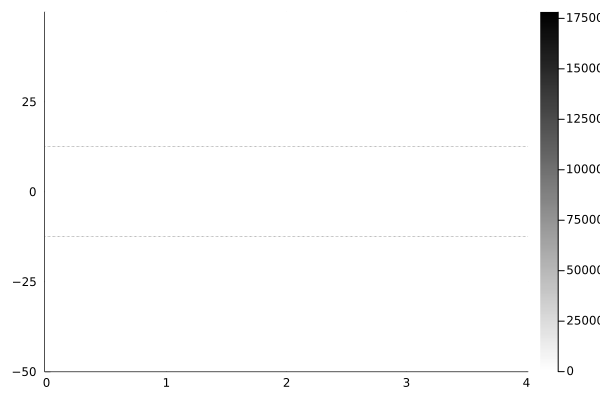

In [4]:
using Plots
using FFTW
freqs=fftfreq(size(u,2),1.0/delta_t) |> fftshift
B = zeros(Int(size(u,1)),Int(size(freqs,1)))
for i = 1:Int(size(u,1))
    signal = u[i,:]
    F = fft(signal) |> fftshift
    F=abs2.(F)
    for j = 1:length(F)
        B[i,j]=F[j]
    end
end
heatmap(x[:],(freqs),transpose(B),c=cgrad([:white,:black]))

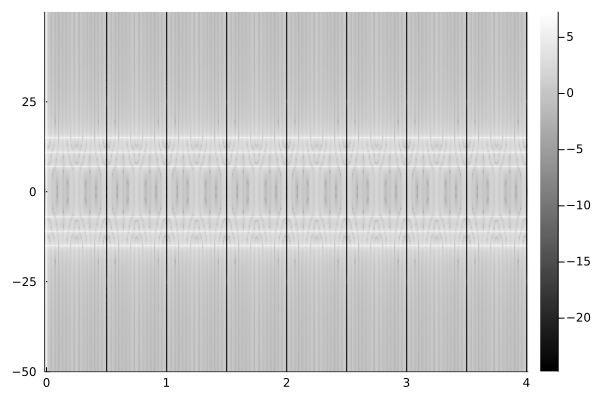

In [18]:
L = 4 #length
T = 20 #Total
delta_t = .01 #Timestep
c = 1 #Wavespeed
delta_r = .01 #Spatial step
ntsteps = T/delta_t #number of time steps
nrsteps = L/delta_r #number of segments of string
u = zeros(Int(nrsteps)+3, Int(ntsteps)+1)
x = zeros(Int(nrsteps)+3, 1)
x[1]= -1*delta_r
for i = 1:Int(nrsteps)+2
    x[i+1]=x[i]+delta_r
end
t=zeros(Int(ntsteps)+1,1)
t[1]=0
for i =1:Int(ntsteps)
    t[i+1]=t[i]+delta_t
end
#Initial Conditions
for i=1:Int(nrsteps)+3
    u[i,1:2].=4*sin(15*2pi*x[i])+4*sin(7*2pi*x[i])+4*sin(11*2pi*x[i])
end
#Leapfrog Integration
for j=2:(Int(ntsteps))

    for i = 2:Int(nrsteps)+2
        u[1,j] = -u[3,j]
        u[Int(nrsteps+3),j] = -u[Int(nrsteps+1),j]
        u[i,j+1] = 2*u[i,j]-u[i,j-1]+((c*delta_t/delta_r)^(2))*(u[i-1,j]-2*u[i,j]+u[i+1,j])

    end

end
#FFT Code starts here
freqs=fftfreq(size(u,2),1.0/delta_t) |> fftshift
B = zeros(Int(size(freqs,1)),Int(size(u,1)))
for i = 1:Int(size(u,1))
    signal = u[i,:]
    F = fft(signal) |> fftshift
    F=abs2.(F)
    for j = 1:length(F)
        B[j,i]=log10(abs(F[j]))
    end
end
#Plotting FFT code starts here
heatmap(x[:],(freqs),B,c=cgrad([:black,:white]))
#parameters: L=4, T=20, delta_t=0.01,delta_r=0.01,c=1
#Initial Data: 4*sin(15*2pi*x[i])+4*sin(7*2pi*x[i])+4*sin(11*2pi*x[i])

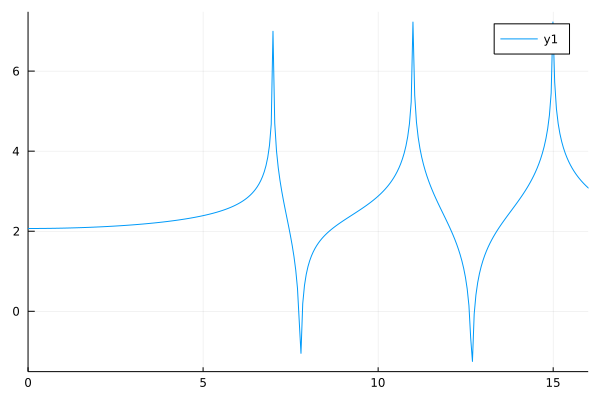

In [20]:
plot(freqs,B[:,300], xlims=(0,16))
#Initial Data: 4*sin(15*2pi*x[i])+4*sin(7*2pi*x[i])+4*sin(11*2pi*x[i])
#Expected Frequencies at 7, 11, and 15. 
# ~Works~

Below this may be outdated code that I just have down here to mess with
______________________________________________________________________

In [ ]:
L = 1 #length
T = 10 #Total Time
delta_t = .01 #Timestep
c = 1.5 #Wavespeed
delta_r = .02 #Spatial step
ntsteps = T/delta_t #number of time steps
nrsteps = L/delta_r #number of segments of string
using Plots
using FFTW
u = zeros(Int(nrsteps)+3, Int(ntsteps)+1)
x = zeros(Int(nrsteps)+3, 1)
x[1]= -1*delta_r
for i = 1:Int(nrsteps)+2
    x[i+1]=x[i]+delta_r
end
t=zeros(Int(ntsteps)+1,1)
t[1]=0
for i =1:Int(ntsteps)
    t[i+1]=t[i]+delta_t
end
#Random Initial Conditions
for i=1:Int(nrsteps)+3
    u[i,1:2].=4*rand()
end
#Leapfrog Integration
for j=2:(Int(ntsteps))

    for i = 2:Int(nrsteps)+2
        u[1,j] = -u[3,j]
        u[Int(nrsteps+3),j] = -u[Int(nrsteps+1),j]
        u[i,j+1] = 2*u[i,j]-u[i,j-1]+((c*delta_t/delta_r)^(2))*(u[i-1,j]-2*u[i,j]+u[i+1,j])

    end

end
#Initial Condition: 4*sin(25*pi*x[i])
using Plots
using FFTW
using DSP
freqs=fftfreq(size(u,2),1.0/delta_t) |> fftshift
B = zeros(Int(size(u,1)),Int(size(freqs,1)))
for i = 1:Int(size(u,1))
    signal = u[i,:]
    F = fft(signal) |> fftshift
    F=abs2.(F)
    for j = 1:length(F)
        B[i,j]=F[j]
    end
end
heatmap(x[:],(freqs),transpose(B),c=cgrad([:white,:black]))

In [ ]:
using Random

In [ ]:
10*rand()

In [ ]:
#Initial Condition: 4*sin(25*pi*x[i])
using Plots
using FFTW
using DSP
freqs=fftfreq(size(u,2),1.0/delta_t) |> fftshift
B = zeros(Int(size(u,1)),Int(size(freqs,1)))
for i = 1:Int(size(u,1))
    signal = u[i,:]
    F = fft(signal) |> fftshift
    F=abs2.(F)
    for j = 1:length(F)
        B[i,j]=F[j]
    end
end
heatmap(x[:],(freqs),transpose(B),c=cgrad([:white,:black]))

In [ ]:
size(u,2)

In [ ]:
L = 4 #length
T = 10 #Total Time
delta_t = .01 #Timestep
c = 2 #Wavespeed
delta_r = .02 #Spatial step
ntsteps = T/delta_t #number of time steps
nrsteps = L/delta_r #number of segments of string

In [ ]:
function wave_equation(delta_r, delta_t)
    L = 4
    T = 10
    c= 1.5
    ntsteps = T/delta_t #number of time steps
    nrsteps = L/delta_r #number of segments of string
    u = zeros(Int(nrsteps)+3, Int(ntsteps)+1)
    x = zeros(Int(nrsteps)+3, 1)
    x[1]= -1*delta_r
    for i = 1:Int(nrsteps)+2
        x[i+1]=x[i]+delta_r
    end
    t=zeros(Int(ntsteps)+1,1)
    t[1]=0
    for i =1:Int(ntsteps)
        t[i+1]=t[i]+delta_t
    end
    #Initial Conditions
    for i=1:Int(nrsteps)+3
        u[i,1:2].=4*sin(.5*pi*x[i])
    end
    #Leapfrog Integration
    for j=2:(Int(ntsteps))
        for i = 2:Int(nrsteps)+2
            u[1,j] = -u[3,j]
            u[Int(nrsteps+3),j] = -u[Int(nrsteps+1),j]
            u[i,j+1] = 2*u[i,j]-u[i,j-1]+((c*delta_t/delta_r)^(2))*(u[i-1,j]-2*u[i,j]+u[i+1,j])
        end
    u[1,:] = -u[3,:]
    u[Int(nrsteps+3),:] = -u[Int(nrsteps+1),:]
    end
    error_list = []
    error_max = 0
    for i =1:Int(nrsteps)+3
        error_list = vcat(error_list,abs(u[i,Int((8/delta_t)+1)]-4*sin(.5*pi*x[i])))
    end
    error_max = maximum(error_list)
    return error_max,delta_r
end
y = []
for i = 0.02:0.01:20
    if isinteger(L/i) && isinteger(T/(.5*i))
        y = vcat(y,wave_equation(i,.5*i))
    end
end
z = []
w = []
#Log the error and delta_r
for i = 1:size(y,1)-2
    a = log10(y[i,1][1])
    z = vcat(z,a)
end
for i = 1:size(y,1)-2
    a = log10(y[i,1][2])
    w = vcat(w,a)
end
plot(w,z)

In [ ]:
d =[]
for i = 1:size(w,1)-1
    d=vcat(d,(z[i+1]-z[i])/(w[i+1]-w[i]))
end

In [ ]:
d

In [ ]:
    L = 4
    T = 10
    c= 1
    ntsteps = T/delta_t #number of time steps
    nrsteps = L/delta_r #number of segments of string
    u = zeros(Int(nrsteps)+3, Int(ntsteps)+1)
    x = zeros(Int(nrsteps)+3, 1)
    x[1]= -1*delta_r
    for i = 1:Int(nrsteps)+2
        x[i+1]=x[i]+delta_r
    end
    t=zeros(Int(ntsteps)+1,1)
    t[1]=0
    for i =1:Int(ntsteps)
        t[i+1]=t[i]+delta_t
    end
    #Initial Conditions
    for i=1:Int(nrsteps)+3
        u[i,1:2].=4*sin(.5*pi*x[i])
    end
    #Leapfrog Integration
    for j=2:(Int(ntsteps))

        for i = 2:Int(nrsteps)+2
            u[1,j] = -u[3,j]
            u[Int(nrsteps+3),j] = -u[Int(nrsteps+1),j]
            u[2,j]=0
            u[Int(nrsteps+2),j]=0
            u[i,j+1] = 2*u[i,j]-u[i,j-1]+((c*delta_t/delta_r)^(2))*(u[i-1,j]-2*u[i,j]+u[i+1,j])

        end
    end
    anim = @animate for i ∈ 1:Int(ntsteps)+1
        plot(x[2:Int(nrsteps+2)],u[2:Int(nrsteps+2),i], xlims =(0,4),ylims=(-4,4))
    end
    gif(anim, "sine_wave_good.gif",fps=15)

In [ ]:
y = []
for i = 0.02:0.02:10
    if isinteger(L/i) && isinteger(T/(.5*i))
        y = vcat(y,wave_equation(i,.5*i))
    end
end

In [ ]:
z = []
w = []
for i = 1:size(y,1)
    a = log10(y[i,1][1])
    z = vcat(z,a)
end
for i = 1:size(y,1)
    a = log10(y[i,1][2])
    w = vcat(w,a)
end


In [ ]:
plot(w,z)

In [ ]:
anim = @animate for i ∈ 1:Int(ntsteps)+1
    plot(x[2:Int(nrsteps+2)],u[2:Int(nrsteps+2),i], xlims =(0,4),ylims=(-4,4))
end
gif(anim, "sine_wave_good.gif",fps=15)

In [ ]:
#Same as above but trying a dirac function in the middle
L = 4 #length
T = 4 #Total Time
delta_t = .01 #Timestep
c = 2 #Wavespeed
delta_r = .02 #Spatial step
ntsteps = T/delta_t #number of time steps
nrsteps = L/delta_r #number of segments of string
using Plots
u = zeros(Int(nrsteps)+2, Int(ntsteps)+1)
x = zeros(Int(nrsteps)+2, 1)
x[1]= -0.5*delta_r
for i = 1:Int(nrsteps)+1
    x[i+1]=x[i]+delta_r
end
t=zeros(Int(ntsteps)+1,1)
t[1]=0
for i =1:Int(ntsteps)
    t[i+1]=t[i]+delta_t
end
#=Initial Conditions
for i=1:Int(nrsteps)+2
    u[i,1:2].=4*sin(.5*pi*x[i])
end
=#
#Alternate Initial Conditions
for i=50:Int(nrsteps)-50
    u[i,1]=2
    u[i,2]=2
end


#Leapfrog Integration
for j=2:(Int(ntsteps))
    for i = 2:Int(nrsteps)+1
        u[i,j+1] = 2*u[i,j]-u[i,j-1]+((c*delta_t/delta_r)^(2))*(u[i-1,j]-2*u[i,j]+u[i+1,j])        
    end
end
#B.C
u[1,:] = -u[2,:]
u[Int(nrsteps+2),:]=-u[Int(nrsteps+1),:]
anim = @animate for i ∈ 1:Int(ntsteps)+1
    plot(x,u[:,i], xlims =(0,4),ylims=(-4,4))
end
gif(anim, "dirac_function.gif",fps=15)